# NetworkXライブラリ
[NetworkX](https://networkx.github.io/documentation/stable/index.html)

以下ではNetworkXライブラリを用いたネットワーク（グラフ）データ処理の基礎について説明します。なお、以下は2.X系のNetworkXの説明です。1.X系とは一部異なる仕様があります。ECCS端末のAnacondaは古い1.X系のNetworkXとなっているので、本ノートブックはBinderかNetwork2.X系がインストールされている環境で実行することを勧めます。2019年5月時点で最新のNetworkXのバージョンは2.2です。

In [26]:
import networkx as nx
from networkx.algorithms import community
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# 空の無向グラフの作成
G = nx.Graph()

In [28]:
# グラフにノード追加
G.add_node(1)

# グラフにラベル付きノード追加
G.add_node('one')

# グラフに属性付きノード追加
G.add_node(2, weight=5)

# 属性には任意のオブジェクトを付加できる
G.add_node(3, name=['node','number','three'])

# リストの要素からノード追加
# 集合, 辞書, 文字列, グラフオブジェクトも指定可能
G.add_nodes_from([4,5,6])

In [29]:
# グラフに含まれるすべてのノードをリストとして返す
print(G.nodes)
print(G.nodes.data())

[1, 'one', 2, 3, 4, 5, 6]
[(1, {}), ('one', {}), (2, {'weight': 5}), (3, {'name': ['node', 'number', 'three']}), (4, {}), (5, {}), (6, {})]


In [30]:
# ノードの属性情報を辞書として返す
print(G.nodes[3])
print(G.nodes[3]['name'])

{'name': ['node', 'number', 'three']}
['node', 'number', 'three']


In [31]:
# ノードの繰り返し処理
for n in G:
    print(n)

1
one
2
3
4
5
6


In [32]:
# グラフにエッジ追加
G.add_edge(1,2)

# グラフに属性付きエッジ追加
G.add_edge(2,3, weight=10, name="edge from 2 to 3")

# タプルを要素としたリストからエッジ追加
G.add_edges_from([(3,4),(3,5),(2,4)])

# タプルの3番目の要素をエッジの重みとして、リストから重み付きエッジ追加
G.add_weighted_edges_from([(4,5,20),(5,6,30)])

In [33]:
# グラフに含まれるすべてのエッジをリストとして返す
print(G.edges)
print(G.edges.data())

[(1, 2), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6)]
[(1, 2, {}), (2, 3, {'weight': 10, 'name': 'edge from 2 to 3'}), (2, 4, {}), (3, 4, {}), (3, 5, {}), (4, 5, {'weight': 20}), (5, 6, {'weight': 30})]


In [34]:
# エッジの繰り返し処理
for e in G.edges:
    print(e)

(1, 2)
(2, 3)
(2, 4)
(3, 4)
(3, 5)
(4, 5)
(5, 6)


In [35]:
# ノードに隣接するノード
print(list(G.neighbors(2)))

# ノードに隣接するノードの情報の辞書を返す
print(G[2])
print(G.adj[2])

# エッジの情報
print(G[2][3])
print(G.edges[2, 3])

# エッジの属性
print(G[2][3]['name'])
print(G.edges[2, 3]['weight'])

[1, 3, 4]
{1: {}, 3: {'weight': 10, 'name': 'edge from 2 to 3'}, 4: {}}
{1: {}, 3: {'weight': 10, 'name': 'edge from 2 to 3'}, 4: {}}
{'weight': 10, 'name': 'edge from 2 to 3'}
{'weight': 10, 'name': 'edge from 2 to 3'}
edge from 2 to 3
10


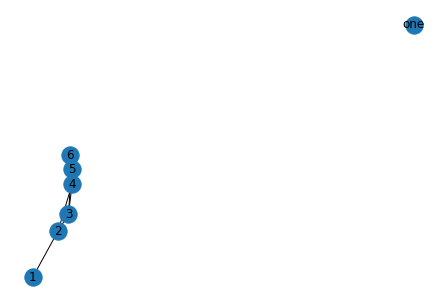

In [36]:
# グラフの描画
nx.draw(G, with_labels=True)

In [37]:
# グラフからノードとそのノードに接続するすべてのエッジを削除
G.remove_node('one')

# グラフからエッジを削除
G.remove_edge(4,5)

# グラフからすべてのノードとエッジを削除
#　G.clear

In [38]:
# エッジがあるかの確認
print(G.has_edge(1,2))
print(G.has_edge(1,3))

True
False


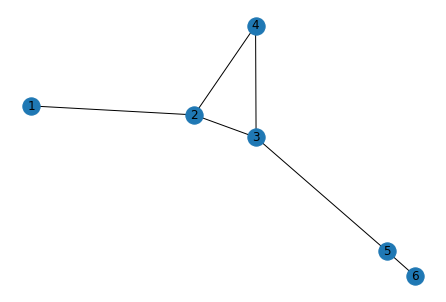

In [39]:
# ネットワーク図をファイルに保存
nx.draw(G, with_labels=True)
plt.savefig('network.png')

In [40]:
# ノードの数
print(len(G))

# エッジの数
print(G.size())

6
6


In [41]:
# エッジの重みを1に設定し直す
G[2][3]['weight']=1
G[5][6]['weight']=1

# グラフの隣接行列
print(nx.adjacency_matrix(G))
print(nx.adjacency_matrix(G).toarray())

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (4, 2)	1
  (4, 5)	1
  (5, 4)	1
[[0 1 0 0 0 0]
 [1 0 1 1 0 0]
 [0 1 0 1 1 0]
 [0 1 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 1 0]]


In [42]:
# 隣接行列の積
A=nx.adjacency_matrix(G).toarray()
print(np.dot(A,A))

[[1 0 1 1 0 0]
 [0 3 1 1 1 0]
 [1 1 3 1 0 1]
 [1 1 1 2 1 0]
 [0 1 0 1 2 0]
 [0 0 1 0 0 1]]


In [43]:
# 最短経路
path = nx.shortest_path(G)
print(path[1][6])
print(path[4][6])

# ノード1からの最短経路
print(nx.shortest_path(G,1))

# ノード1と6の間の最短経路
print(nx.shortest_path(G,1,6))

# ノード1と6の間の最短経路長
print(nx.shortest_path_length(G,1,6))

[1, 2, 3, 5, 6]
[4, 3, 5, 6]
{1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 4], 5: [1, 2, 3, 5], 6: [1, 2, 3, 5, 6]}
[1, 2, 3, 5, 6]
4


In [44]:
#平均最短距離
print(nx.average_shortest_path_length(G))

#平均クラスタリング係数
print(nx.average_clustering(G))

1.9333333333333333
0.27777777777777773


In [45]:
# 次数中心性 (次数/ネットワークの最大次数（n-1)で標準化)
print(nx.degree_centrality(G))

# 近接中心性
print(nx.closeness_centrality(G))

# 媒介中心性
print(nx.betweenness_centrality(G))

{1: 0.2, 2: 0.6000000000000001, 3: 0.6000000000000001, 4: 0.4, 5: 0.4, 6: 0.2}
{1: 0.4166666666666667, 2: 0.625, 3: 0.7142857142857143, 4: 0.5555555555555556, 5: 0.5555555555555556, 6: 0.38461538461538464}
{1: 0.0, 2: 0.4, 3: 0.6000000000000001, 4: 0.0, 5: 0.4, 6: 0.0}


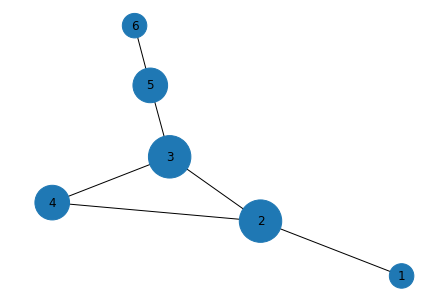

In [46]:
# 媒介中心性の値でノードの大きさを変えて可視化
node_size = np.array(list((nx.degree_centrality(G)).values()))
nx.draw(G, with_labels=True,  node_size = [v * 3000 for v in node_size])

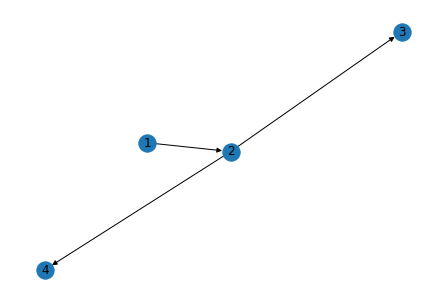

In [47]:
# 有効グラフの作成（ただし自己閉路を含まない）
DiG = nx.DiGraph()
DiG.add_edges_from([(1,2),(2,3),(2,4)])
nx.draw(DiG, with_labels=True)

In [48]:
# 有向グラフにおける点の後続点
print (list(DiG.successors(2)))

# 有向グラフにおける点の先行点
print(list(DiG.predecessors(2)))

[3, 4]
[1]


In [49]:
# ノードの次数
print(DiG.degree(2))

# ノードの入次数
print(DiG.in_degree(2))

# ノードの出次数
print(DiG.out_degree(2))

#グラフの各ノードの次数
list(DiG.degree)

3
1
2


[(1, 1), (2, 3), (3, 1), (4, 1)]